### Activity 8
### 63010026 กฤตศยา นทีมณฑล
### 63010062 กันต์กนิษฐ์ ทองเก๋ง
### 63010339 ณัฐวดี ติณภูมิ

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import glob
from scipy import stats
import datetime as dt
from sklearn import model_selection

## (a) Load and Prepare Data

In [4]:
ACC = pd.read_csv("46343_acceleration.txt", sep = ' ',names=['timedelta', 'accX', 'accY', 'accZ'])
HeartR = pd.read_csv("46343_heartrate.txt", sep = ',',names=['timedelta', 'heartrate'])
SleepL = pd.read_csv("46343_labeled_sleep.txt", sep = ' ',names=['timedelta', 'sleep'])

In [5]:
ACC

,timedelta,accX,accY,accZ
0,-124489.161050,0.017487,-0.586700,-0.805771
1,-124489.116395,0.018982,-0.589676,-0.809158
2,-124489.115548,0.020966,-0.580887,-0.815048
3,-124489.114691,0.019485,-0.580872,-0.813583
4,-124489.097700,0.016998,-0.587204,-0.806259
...,...,...,...,...
981995,17642.967007,0.505249,0.425720,-0.748764
981996,17642.987576,0.508194,0.429138,-0.750717
981997,17643.006946,0.508179,0.427200,-0.747284
981998,17643.026865,0.505737,0.427673,-0.749741


In [6]:
HeartR

,timedelta,heartrate
0,-556410.36066,57
1,-556408.36062,56
2,-556403.36062,56
3,-556399.36062,57
4,-556389.36062,59
...,...,...
4873,16959.47229,72
4874,16964.47229,74
4875,16970.47229,75
4876,16975.47229,76


In [7]:
SleepL

,timedelta,sleep
0,0,-1
1,30,-1
2,60,-1
3,90,-1
4,120,-1
...,...,...
562,16860,0
563,16890,0
564,16920,0
565,16950,0


In [8]:
# Check ''timedelta' max(), min() of ACC, HeartR, SleepL (ช่วงเวลาที่มีข้อมูลใกล้กัน)
ACC_max_date = ACC['timedelta'].max()
ACC_min_date = ACC['timedelta'].min()
HeartR_max_date = HeartR['timedelta'].max()
HeartR_min_date = HeartR['timedelta'].min()
SleepL_max_date = SleepL['timedelta'].max()
SleepL_min_date = SleepL['timedelta'].min()
print("ACC start:",ACC_min_date,"ACC end:",ACC_max_date)
print("HeartR start:",HeartR_min_date,"HeartR end:",HeartR_max_date)
print("SleepL start:",SleepL_min_date,"SleepL end:",SleepL_max_date)

ACC start: -124489.16105 ACC end: 17643.046417
HeartR start: -556410.36066 HeartR end: 16980.47229
SleepL start: 0 SleepL end: 16980


In [9]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# ACC_new = ACC[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date)  & (HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date) & (SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]
ACC_new = ACC[(ACC['timedelta'] > ACC_min_date)&(ACC['timedelta'] < ACC_max_date)]
ACC_new

,timedelta,accX,accY,accZ
1,-124489.116395,0.018982,-0.589676,-0.809158
2,-124489.115548,0.020966,-0.580887,-0.815048
3,-124489.114691,0.019485,-0.580872,-0.813583
4,-124489.097700,0.016998,-0.587204,-0.806259
5,-124489.078316,0.019959,-0.593094,-0.806198
...,...,...,...,...
981994,17642.946943,0.506226,0.428665,-0.748779
981995,17642.967007,0.505249,0.425720,-0.748764
981996,17642.987576,0.508194,0.429138,-0.750717
981997,17643.006946,0.508179,0.427200,-0.747284


In [10]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# HeartR_new = HeartR[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date)  & (HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date) & (SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]
HeartR_new = HeartR[(HeartR['timedelta'] > HeartR_min_date)&(HeartR['timedelta'] < HeartR_max_date)]
HeartR_new

,timedelta,heartrate
1,-556408.36062,56
2,-556403.36062,56
3,-556399.36062,57
4,-556389.36062,59
5,-556163.88076,61
...,...,...
4872,16954.47226,73
4873,16959.47229,72
4874,16964.47229,74
4875,16970.47229,75


In [11]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# SleepL_new = SleepL[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date)  & (HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date) & (SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]
SleepL_new =SleepL[(SleepL['timedelta'] > SleepL_min_date)&(SleepL['timedelta'] <SleepL_max_date)]
SleepL_new

,timedelta,sleep
1,30,-1
2,60,-1
3,90,-1
4,120,-1
5,150,-1
...,...,...
561,16830,0
562,16860,0
563,16890,0
564,16920,0


## Load and Prepare Data (ACC)

In [12]:
# ------------ Rounding ACC (Rounding to 1 sec) -------------------------------#  
# # Convert to datetime and round to second,
ACC_new['timedelta'] = pd.DataFrame(pd.to_timedelta(ACC_new['timedelta'],unit="s").round('1s'))
ACC_new

C:\Users\ROG\AppData\Local\Temp\ipykernel_3552\3782895249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_new['timedelta'] = pd.DataFrame(pd.to_timedelta(ACC_new['timedelta'],unit="s").round('1s'))


,timedelta,accX,accY,accZ
1,-2 days +13:25:11,0.018982,-0.589676,-0.809158
2,-2 days +13:25:11,0.020966,-0.580887,-0.815048
3,-2 days +13:25:11,0.019485,-0.580872,-0.813583
4,-2 days +13:25:11,0.016998,-0.587204,-0.806259
5,-2 days +13:25:11,0.019959,-0.593094,-0.806198
...,...,...,...,...
981994,0 days 04:54:03,0.506226,0.428665,-0.748779
981995,0 days 04:54:03,0.505249,0.425720,-0.748764
981996,0 days 04:54:03,0.508194,0.429138,-0.750717
981997,0 days 04:54:03,0.508179,0.427200,-0.747284


In [13]:
# Average rounding duplicated time
df_acc_X = ACC_new.groupby('timedelta')['accX'].mean()
df_acc_Y = ACC_new.groupby('timedelta')['accY'].mean()
df_acc_Z = ACC_new.groupby('timedelta')['accZ'].mean()

In [14]:
# acc_X, acc_Y, acc_Z
ACC_new2 = pd.concat([df_acc_X, df_acc_Y, df_acc_Z], axis=1).reset_index()
ACC_new2

,timedelta,accX,accY,accZ
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241
...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636
19589,0 days 04:54:00,0.502466,0.428149,-0.750749
19590,0 days 04:54:01,0.502944,0.428004,-0.750483
19591,0 days 04:54:02,0.506228,0.428170,-0.748264


In [15]:
# ACC_new2['timedelta'] = ACC_new2['timedelta'] - ACC_new2['timedelta'].min()
# ACC_new2

## Load and Prepare Data (Heart Rate)

In [16]:
# ------------ Rounding Heart Rate (Rounding to 1 sec) -------------------------------
HeartR_new['timedelta'] = pd.DataFrame(pd.to_timedelta(HeartR_new['timedelta'],unit="s").round('1s'))
# HeartR_new['timedelta'] = HeartR_new['timedelta'] - HeartR_new['timedelta'].min()
HeartR_new

C:\Users\ROG\AppData\Local\Temp\ipykernel_3552\786107525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HeartR_new['timedelta'] = pd.DataFrame(pd.to_timedelta(HeartR_new['timedelta'],unit="s").round('1s'))


,timedelta,heartrate
1,-7 days +13:26:32,56
2,-7 days +13:26:37,56
3,-7 days +13:26:41,57
4,-7 days +13:26:51,59
5,-7 days +13:30:36,61
...,...,...
4872,0 days 04:42:34,73
4873,0 days 04:42:39,72
4874,0 days 04:42:44,74
4875,0 days 04:42:50,75


In [17]:
# Resampling every 1s with median with ffill
resample_rule = '1s'
HeartR_new2 = HeartR_new.set_index('timedelta').resample(resample_rule,).median().ffill()
HeartR_new2

,heartrate
timedelta,
-7 days +13:26:32,56.0
-7 days +13:26:33,56.0
-7 days +13:26:34,56.0
-7 days +13:26:35,56.0
-7 days +13:26:36,56.0
...,...
0 days 04:42:51,75.0
0 days 04:42:52,75.0
0 days 04:42:53,75.0


## Load and Prepare Data (Sleep Label)

In [18]:
# ------------ Rounding Sleep Label (Rounding to 1 sec) -------------------------------
SleepL_new['timedelta'] = pd.DataFrame(pd.to_timedelta(SleepL_new['timedelta'],unit="s").round('1s'))
# SleepL_new['timedelta'] = SleepL_new['timedelta'] - SleepL_new['timedelta'].min()
SleepL_new

C:\Users\ROG\AppData\Local\Temp\ipykernel_3552\3998733642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SleepL_new['timedelta'] = pd.DataFrame(pd.to_timedelta(SleepL_new['timedelta'],unit="s").round('1s'))


,timedelta,sleep
1,0 days 00:00:30,-1
2,0 days 00:01:00,-1
3,0 days 00:01:30,-1
4,0 days 00:02:00,-1
5,0 days 00:02:30,-1
...,...,...
561,0 days 04:40:30,0
562,0 days 04:41:00,0
563,0 days 04:41:30,0
564,0 days 04:42:00,0


In [19]:
# Resampling every 1s with median with ffill
resample_rule = '1s'
SleepL_new2 = SleepL_new.set_index('timedelta').resample(resample_rule,).median().ffill()
SleepL_new2

,sleep
timedelta,
0 days 00:00:30,-1.0
0 days 00:00:31,-1.0
0 days 00:00:32,-1.0
0 days 00:00:33,-1.0
0 days 00:00:34,-1.0
...,...
0 days 04:42:26,0.0
0 days 04:42:27,0.0
0 days 04:42:28,0.0


## Merge Data and Standardized data

In [20]:
# ------------Merge All Data -------------------------------
df = []
df = pd.merge_asof(ACC_new2, HeartR_new2, on='timedelta')
df = pd.merge_asof(df, SleepL_new2, on = 'timedelta')
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041,86.0,NaN
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431,86.0,NaN
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828,86.0,NaN
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320,86.0,NaN
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241,86.0,NaN
...,...,...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636,76.0,0.0
19589,0 days 04:54:00,0.502466,0.428149,-0.750749,76.0,0.0
19590,0 days 04:54:01,0.502944,0.428004,-0.750483,76.0,0.0
19591,0 days 04:54:02,0.506228,0.428170,-0.748264,76.0,0.0


In [21]:
#Fill NA
#Heart rate
df['heartrate'].fillna(df['heartrate'].median(),inplace=True)
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041,86.0,NaN
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431,86.0,NaN
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828,86.0,NaN
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320,86.0,NaN
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241,86.0,NaN
...,...,...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636,76.0,0.0
19589,0 days 04:54:00,0.502466,0.428149,-0.750749,76.0,0.0
19590,0 days 04:54:01,0.502944,0.428004,-0.750483,76.0,0.0
19591,0 days 04:54:02,0.506228,0.428170,-0.748264,76.0,0.0


In [22]:
#Fill NA
#Sleep Label
df['sleep'].fillna(0,inplace=True)
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041,86.0,0.0
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431,86.0,0.0
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828,86.0,0.0
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320,86.0,0.0
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241,86.0,0.0
...,...,...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636,76.0,0.0
19589,0 days 04:54:00,0.502466,0.428149,-0.750749,76.0,0.0
19590,0 days 04:54:01,0.502944,0.428004,-0.750483,76.0,0.0
19591,0 days 04:54:02,0.506228,0.428170,-0.748264,76.0,0.0


In [23]:
#Drop Column
df.drop(columns='timedelta')

,accX,accY,accZ,heartrate,sleep
0,0.016081,-0.585817,-0.811041,86.0,0.0
1,0.038944,-0.578258,-0.818431,86.0,0.0
2,0.022542,-0.567728,-0.825828,86.0,0.0
3,0.017970,-0.570523,-0.821320,86.0,0.0
4,0.038620,-0.565942,-0.827241,86.0,0.0
...,...,...,...,...,...
19588,0.504763,0.430875,-0.747636,76.0,0.0
19589,0.502466,0.428149,-0.750749,76.0,0.0
19590,0.502944,0.428004,-0.750483,76.0,0.0
19591,0.506228,0.428170,-0.748264,76.0,0.0


In [24]:
# Standardized data
scaler = preprocessing.StandardScaler()
feature_columns = df[['accX', 'accY', 'accZ', 'heartrate']]
label_columns = df[['sleep']]
df_feature = pd.DataFrame(scaler.fit_transform(feature_columns.values),index = feature_columns.index,columns=feature_columns.columns)
df_feature

,accX,accY,accZ,heartrate
0,0.067321,-1.272417,-0.730280,0.684847
1,0.124300,-1.251807,-0.739550,0.684847
2,0.083422,-1.223095,-0.748830,0.684847
3,0.072028,-1.230717,-0.743175,0.684847
4,0.123492,-1.218226,-0.750602,0.684847
...,...,...,...,...
19588,1.285227,1.499704,-0.650738,-0.652200
19589,1.279502,1.492272,-0.654644,-0.652200
19590,1.280695,1.491878,-0.654310,-0.652200
19591,1.288878,1.492329,-0.651526,-0.652200


In [25]:
df_label = label_columns
df_label

,sleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
19588,0.0
19589,0.0
19590,0.0
19591,0.0


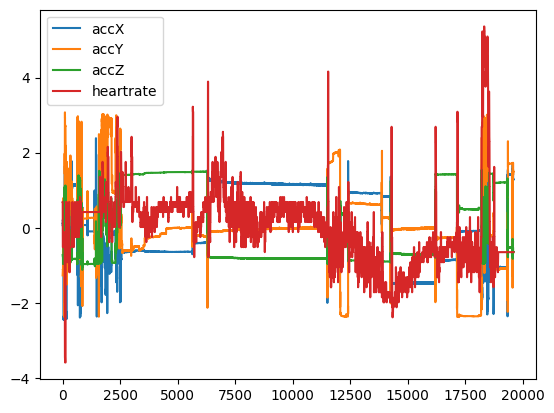

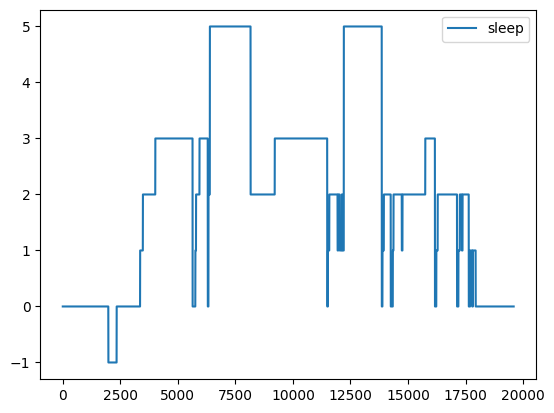

In [26]:
# Visualize signals
df_feature.plot(), df_label.plot()
plt.show()

## SVM

In [27]:
#standardizedแล้ว
X = df_feature
X

,accX,accY,accZ,heartrate
0,0.067321,-1.272417,-0.730280,0.684847
1,0.124300,-1.251807,-0.739550,0.684847
2,0.083422,-1.223095,-0.748830,0.684847
3,0.072028,-1.230717,-0.743175,0.684847
4,0.123492,-1.218226,-0.750602,0.684847
...,...,...,...,...
19588,1.285227,1.499704,-0.650738,-0.652200
19589,1.279502,1.492272,-0.654644,-0.652200
19590,1.280695,1.491878,-0.654310,-0.652200
19591,1.288878,1.492329,-0.651526,-0.652200


In [28]:
# df_label = pd.DataFrame(scaler.fit_transform(label_columns.values),index = label_columns.index,columns=label_columns.columns)
Y = df_label
Y

,sleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
19588,0.0
19589,0.0
19590,0.0
19591,0.0


In [29]:
# dataX = df_feature.corr()
# lowerX = pd.DataFrame(np.tril(dataX, -1),columns = dataX.columns)
# dataY = df_label.corr()
# lowerY = pd.DataFrame(np.tril(dataY, -1),columns = dataY.columns)

In [30]:
seed = 339
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size = 0.3, random_state=seed)

In [31]:
# Model Traing Parameter
# # Create SVC model
c_val = 100 
gmm =0.1
d = 2

In [32]:
#Model initialize
svc_lin = SVC(kernel='linear', C=c_val)
svc_rbf = SVC(kernel='rbf', C=c_val, gamma=gmm)
svc_poly = SVC(kernel='poly', C=c_val, degree = d)

In [33]:
X_train

,accX,accY,accZ,heartrate
3683,-0.627852,-0.259200,1.461111,0.417437
6512,1.261452,-0.093703,-0.784688,1.620780
15396,-1.460995,-0.034090,-0.710190,-1.187019
9237,1.158731,-0.026791,-0.819564,0.551142
18827,-1.072711,-1.111865,1.194159,-0.785905
...,...,...,...,...
17914,-0.089038,-2.362643,0.481621,-0.518496
5092,-0.643520,-0.016185,1.483291,0.551142
12956,0.923404,0.647663,-0.875571,-1.053315
8598,1.186552,-0.030961,-0.811773,0.417437


In [34]:
Y_train

,sleep
3683,2.0
6512,5.0
15396,2.0
9237,3.0
18827,0.0
...,...
17914,1.0
5092,3.0
12956,5.0
8598,2.0


In [35]:
# lab = preprocessing.LabelEncoder()
# # x_transformed = lab.fit_transform(X_train)
# y_transformed = lab.fit_transform(Y_train)

# # #view transformed values
# y_transformed

In [36]:
# Model Training
svc_rbf_pred = svc_rbf.fit(X_train, Y_train)
svc_poly = svc_poly.fit(X_train, Y_train)

c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# Model Testing (Predict)
svc_rbf_pred = svc_rbf.predict(X_test)
svc_poly_pred = svc_poly.predict(X_test)

In [38]:
# lab2 = preprocessing.LabelEncoder()
# # x_transformed = lab.fit_transform(X_train)
# y_transformed2 = lab2.fit_transform(Y_test2)

# # #view transformed values
# y_transformed2

## SVM Prediction Report

In [39]:
# Model Confusion Matrix of SVC_rbf, SVC_poly
print('Confusion Matrix of SVC rbf: ')
print(confusion_matrix(Y_test,svc_rbf_pred))
print('Classification Report of SVC rbf: ')
print(classification_report(Y_test,svc_rbf_pred))

Confusion Matrix of SVC rbf: 
[[  82   14    0    0    0    0]
 [  13 1355    2  181   33    9]
 [   0   58   47  138    2    9]
 [   0   29   11 1325  101   25]
 [   0    4    0   55 1338    1]
 [   0    8    1  220    0  817]]
Classification Report of SVC rbf: 
              precision    recall  f1-score   support

        -1.0       0.86      0.85      0.86        96
         0.0       0.92      0.85      0.89      1593
         1.0       0.77      0.19      0.30       254
         2.0       0.69      0.89      0.78      1491
         3.0       0.91      0.96      0.93      1398
         5.0       0.95      0.78      0.86      1046

    accuracy                           0.84      5878
   macro avg       0.85      0.75      0.77      5878
weighted avg       0.86      0.84      0.84      5878



In [40]:
print('Confusion Matrix of SVC poly: ')
print(confusion_matrix(Y_test,svc_poly_pred))
print('Classification Report of SVC poly:  ')
print(classification_report(Y_test,svc_poly_pred))

Confusion Matrix of SVC poly: 
[[  81   14    0    1    0    0]
 [  73 1349    0   74   57   40]
 [   2  186    0   50    6   10]
 [   2  605    0  612  225   47]
 [   0   48    0   58 1292    0]
 [   0    7    0  164   19  856]]
Classification Report of SVC poly:  
              precision    recall  f1-score   support

        -1.0       0.51      0.84      0.64        96
         0.0       0.61      0.85      0.71      1593
         1.0       0.00      0.00      0.00       254
         2.0       0.64      0.41      0.50      1491
         3.0       0.81      0.92      0.86      1398
         5.0       0.90      0.82      0.86      1046

    accuracy                           0.71      5878
   macro avg       0.58      0.64      0.59      5878
weighted avg       0.69      0.71      0.69      5878



c:\Python36\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python36\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python36\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#Create Model list
regression = {'SVC' : SVC()}

In [42]:
#Create Model Parameter Dictionary for SVC
kernel = ['rbf', 'poly']
C_list = [0.1, 1.0, 10.0, 100.0, 200.0, 500.0]
# ep_list = [0.1, 1, 5]
Gamma_list = [0.01, 0.1, 1.0, 10]
d_list = [2, 3]
params_SVR = dict( kernel = kernel, C = C_list, gamma = Gamma_list, degree = d_list )

### RBF

In [43]:
param_grid = {'C':  [0.1, 1.0, 10.0, 100.0, 200.0, 500.0], 'gamma': [0.01, 0.1, 1.0, 10],'kernel': ['rbf','poly']} 
grid = GridSearchCV(SVC(), param_grid,scoring = 'accuracy',n_jobs=-1, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
# Show Best Parameters for both models
print('Best params: ',grid.best_params_)
print('Best score: ', grid.best_score_)

Best params:  {'C': 500.0, 'gamma': 10, 'kernel': 'rbf'}
Best score:  0.9375865840320816


In [ ]:
# Show Score for each parameter combination for both model
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))  

0.455341 (0.006955) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.644914 (0.006534) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.759971 (0.007743) with: {'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}
0.819322 (0.005154) with: {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.529712 (0.006663) with: {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.732847 (0.010754) with: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.831425 (0.004551) with: {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
0.881881 (0.008278) with: {'C': 1.0, 'gamma': 10, 'kernel': 'rbf'}
0.692599 (0.006640) with: {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.797521 (0.009424) with: {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.878090 (0.006142) with: {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
0.913161 (0.006141) with: {'C': 10.0, 'gamma': 10, 'kernel': 'rbf'}
0.734524 (0.011152) with: {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.847102 (0.003266) with: {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.908421 (0.006535) with: {'C': 100.0, 

### Poly

In [ ]:
# param_grid = {'degree':[2,3],'C':  [0.1, 1.0, 10.0, 100.0, 200.0], 'gamma': [0.01, 0.1, 1.0],'kernel': ['poly']} 
# grid = GridSearchCV(SVC(), param_grid, cv=2,scoring='accuracy', verbose = 3,n_jobs=-1,)

# # fitting the model for grid search
# grid.fit(X_train, Y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
